<a href="https://colab.research.google.com/github/nadivaagista07/Scientific-Computing/blob/main/Materi_Sesi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SISTEM PERSAMAAN LINEAR

In [ ]:
import numpy as np

In [ ]:
#initiate variablesadfasef

Xs = [
    #soal 1
    [
        [10,4,5],
        [1,6,1],
        [3,1,6]
    ],
    #soal 2
    [
        [9,2,3,2],
        [4,11,2,3],
        [1,-4,8,-1],
        [5,-3,-6,16]
    ]
]

#hasil
Ys = [
    #soal 1
    [8,5,10],
    #soal 2
    [12,9,6,21]
]


def gauss_seidel(x,y, epsilon= 0.01, t=20):
  #ubah list jadi array
  x = np.array(x)
  y = np.array(y)

  #ambil diagonal absolut dari x
  diags = np.diag(np.abs(x))
  #diags = [10,6,6]

  #isi value di diagonal dengan 0
  np.fill_diagonal(x, 0) #x adalah array nya

  #cari value dari off diagonal
  #default axis =0 -> berdasarkan kolom
  #axis =1 -> bedasarkan baris
  off_diag = np.sum(np.abs(x), axis =1)
  #off_diag = [9,2,4]

  #cek diagonal dominant
  if not np.all(diags > off_diag):
    return False

  #ubah ruas kiri jadi minus
  x = -x

  #initiate matrix
  mat_old = np.zeros(x[0].shape)

  #loop pertama
  for j in range (t):
    #copy data mat_old ke mat_new
    mat_new = np.array(mat_old)
    #loop kedua untuk masing-masing variabel
    for k, row in enumerate(x): #enum = kasitau index ke brp
      mat_new[k] = (y[k] + np.dot(mat_new, row))/diags[k] #caranya

      #penjelasan
      #mat_new[0] = [0,0,0]
      #row[0] = [0,-4,-5]
      #maka -> (8+0+0)/10
      #mat_new[1] = [0.8, 0,0]
      #row = [-1,0,-1]
      #maka -> (5 - 0.8 -0)/6 = 0.7

    #display data untuk setiap iterasi
    print(f"Iter -{j}: {mat_new}")


    #Euclidean distance
    #Digunakan untuk mengukur jarak antara dua titik dalam ruang euclidean
    #Euclidean distance antara 2 titik (x1,y1) dan (x2,y2) dalam bidang 2 dimensi

    #rumus euclidian distance
    dx = np.sqrt(np.dot(mat_new - mat_old, mat_new - mat_old))
    if dx < epsilon:
      return True
    #update mat_old
    mat_old = mat_new
  return False



for i, (x,y) in enumerate(zip(Xs,Ys)):
  print(f"Problem {i+1}")
  print(f"Xs= {Xs[i]}")
  print(f"Ys= {Ys[i]}")

  if gauss_seidel(Xs[i], Ys[i]):
    print(f"Converged\n")
  else:
    print("not converged\n")

Problem 1
Xs= [[10, 4, 5], [1, 6, 1], [3, 1, 6]]
Ys= [8, 5, 10]
Iter -0: [0.8  0.7  1.15]
Iter -1: [-0.055       0.65083333  1.58569444]
Iter -2: [-0.25318056  0.61124769  1.69138233]
Iter -3: [-0.29019024  0.59980132  1.7117949 ]
Iter -4: [-0.29581798  0.59733718  1.71501946]
Converged

Problem 2
Xs= [[9, 2, 3, 2], [4, 11, 2, 3], [1, -4, 8, -1], [5, -3, -6, 16]]
Ys= [12, 9, 6, 21]
Iter -0: [1.33333333 0.33333333 0.75       1.23958333]
Iter -1: [0.7337963  0.07691498 0.85168087 1.41699054]
Iter -2: [0.7174607  0.01598398 0.84543322 1.40832798]
Iter -3: [0.73500849 0.01310142 0.84071565 1.40053473]
Iter -4: [0.73895342 0.01465008 0.8400227  1.39933246]
Converged



REGRESSION

membuat garis yang mempresentasikan nilai-nilai pada data


*   least square Regression (Linear regression)
*   Polynomial Regression (Non-Linear regression)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'X')

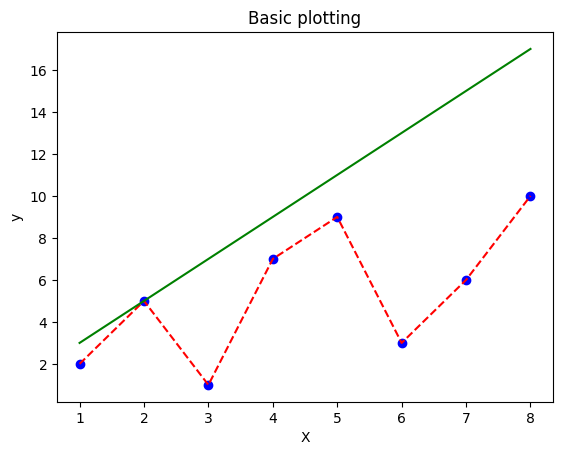

In [ ]:
#Plotting untuk menggambarkann graph, bar chart
x = [1,2,3,4,5,6,7, 8]
y = [2,5,1,7,9,3,6,10]

x = np.array (x)
y = np. array (y)

plt.plot(x,y, 'ob')
#ob : bentuk dan warna marker/point
# 0: bentuk o, b: warna blue
plt.plot(x,y,'r--') #-- : baris putus-putus, r: red
#bisa rumus jg
plt.plot(x, 2* x +1, 'g' )

plt.title("Basic plotting")
plt.ylabel ("y")
plt.xlabel ("X")

In [ ]:
import numpy as np
a = [
    [8, 3, -3],
    [-2, -8, 5],
    [3, 5, 10]
]

diag = np.diag(np.abs(a))

off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
  print("matrix is diagonally dominant")
else:
  print("not diagonally dominant")

matrix is diagonally dominant


In [ ]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

In [ ]:
print("iteration result")
print(" k,   x1,   x2,   x3")
for k in range(1, 50):
  x1 = (14 - 3*x2 + 3*x3) / 8
  x2 = (5 + 2*x1 - 5*x3) / (-8)
  x3 = (-8 - 3*x1 - 5*x2) / (10)
  x = np.array([x1, x2, x3])

  dx = np.sqrt(np.dot(x-x_old, x-x_old))

  print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))

  if dx < epsilon:
    converged = True
    print("converged")
    break

  x_old = x

if not converged:
  print("not converged, increase the number of iterations")

iteration result
 k,   x1,   x2,   x3
1, 1.7500, -1.0625, -0.7937
2, 1.8508, -1.5838, -0.5633
3, 2.1327, -1.5103, -0.6847
4, 2.0596, -1.5678, -0.6340
5, 2.1002, -1.5463, -0.6569
6, 2.0835, -1.5565, -0.6468
7, 2.0911, -1.5520, -0.6513
converged


In [21]:
A = np.array([[4,3,-5],
              [-2,-4,5],
              [8,8,0]])
y = np.array([2,5,-3])

x = np.linalg.solve(A,y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


In [22]:
#matrix inversion
A_inv = np.linalg.inv(A)

x = np.dot(A_inv, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


In [23]:
from scipy import optimize
import matplotlib.pyplot as plt

#generate x and y
x = np.linspace(0,1,101)
y = 1 + x + x * np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y - y[:, np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)) ,A.T)),y)
print(alpha)


[1.55366865 0.99765618]


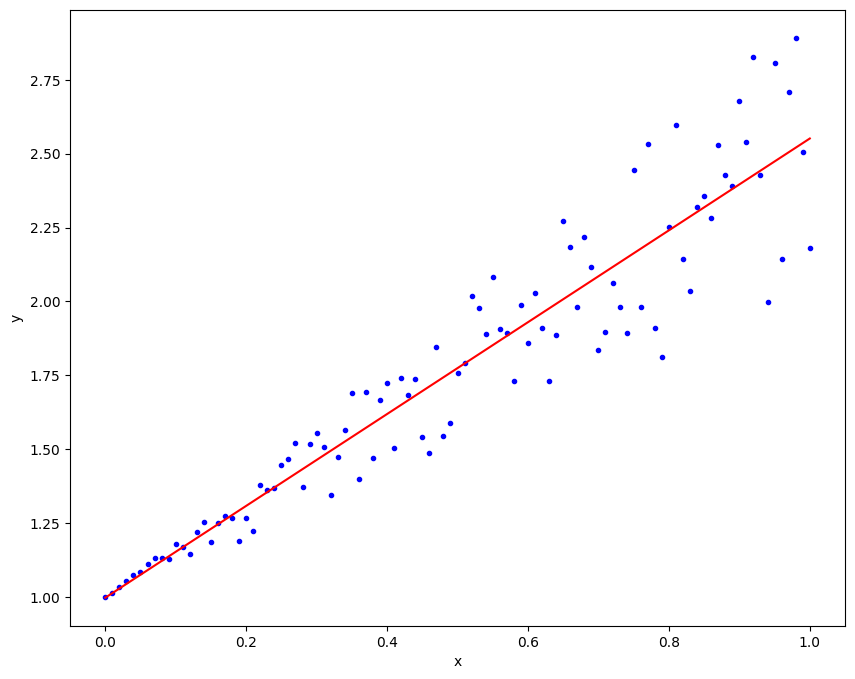

In [24]:
# plot the results
plt.figure(figsize = (10,8))
plt. plot (x, y, 'b.')
plt.plot (x, alpha[0]*x + alpha[1], 'r')
plt.xlabel ('x')
plt. ylabel ('y')
3.00
plt.show ()


In [25]:
pinv = np.linalg.pinv (A)
alpha = pinv.dot (y)
print (alpha)

[1.55366865 0.99765618]


In [26]:
alpha = np.linalg.lstsq(A, y, rcond=None) [0]
print (alpha)

[1.55366865 0.99765618]


In [27]:
# generate x and y
x = np. linspace (0, 1,
101)
y = 1 + x + x * np. random. random (len (x) )
def func(x, a, b):
    y = a*x + b
    return y
alpha = optimize.curve_fit (func, xdata = x, ydata = y) [0]
print (alpha)

[1.50439917 1.00245491]


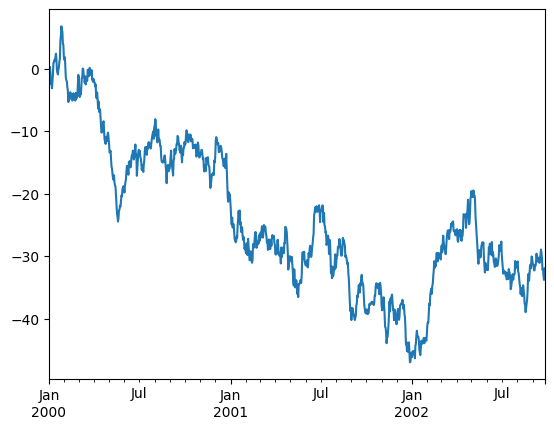

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
ts = pd.Series(np.random. randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts. cumsum ()
ts. plot();

Text(0.5, 0, 'X')

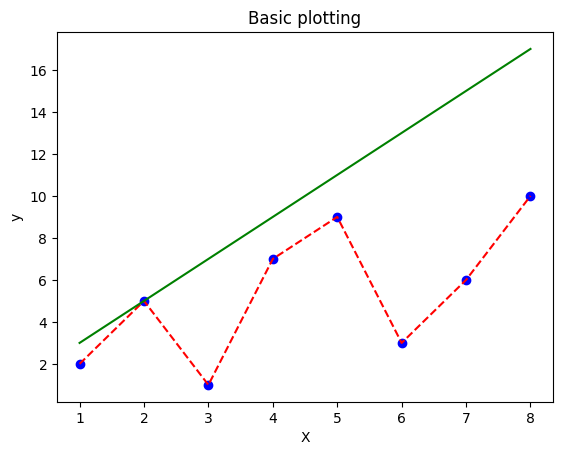

In [29]:
x = [1,2,3,4,5,6,7, 8]
y = [2,5,1,7,9,3,6,10]

x = np.array (x)
y = np. array (y)

plt.plot(x,y, 'ob')
#o = bentuk
#b = blue

plt.plot(x,y,'r--')
#-- = garis putus putus

plt.plot(x, 2* x +1, 'g' )

plt.title("Basic plotting")
plt.ylabel ("y")
plt.xlabel ("X")